In [1]:
# example.ipynb
# Authors: Stephan Meighen-Berger
# Shows the capabilities of the package

In [2]:
# Import generic stuff
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# Font style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

In [4]:
# Import package
# Adding path to module
sys.path.append("../")
# Module imports
from fennel import fennel
from fennel.config import config
# picture path
PICS = '../pics/'

In [5]:
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 20.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.2  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [6]:
fennel_instance = fennel.Fennel()

In [7]:
particles = {}
for particle_key in fennel_instance._particles.keys():
    particles[particle_key] = fennel_instance._particles[particle_key]

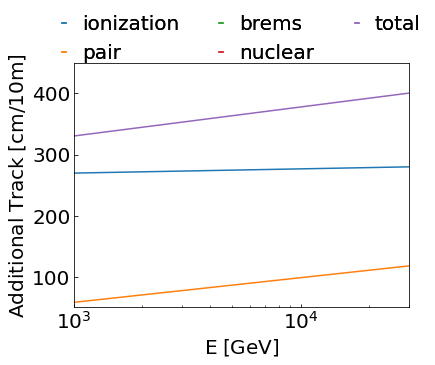

In [17]:
# Additional tracks
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for interaction in config["track"]["additional track water"].keys():
    interaction_res = fennel_instance._track.additional_track_ratio(particles[13], interaction)
    ax1.plot(particles[13]._energies, interaction_res * 1e3, label=interaction)
# ---------------------------------------------
# Plotting options
ax1.set_xscale('log')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$\mathrm{E}\;[\mathrm{GeV}]$', fontsize=fontsize)
ax1.set_ylabel(r'$\mathrm{Additional\;Track\; [cm/10m]}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_ylim(50, 450)
ax1.set_xlim(1e3, 3e4)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Additional_Track.png",
               bbox_inches='tight', dpi=export_dpi)